# P-hacking practical

In [1]:
import pandas as pd
import numpy as np
# import statsmodels.discrete.discrete_model as sm
import statsmodels.api as sm
import scipy.stats as sst
import matplotlib.pyplot as plt
%matplotlib inline

"""
from statsmodels.formula.api import OLS
from statsmodels.formula.api import logit
from statsmodels.formula.api import MNLogit
""";

In [2]:
relative_path_filename = '../../data/phenotypes.aug.csv'

In [3]:
# Load in the dataset, appending 'nd' to the list of possible na_values
hie = pd.read_csv(relative_path_filename, na_values='nd')
original_col_names = list(hie)
hie.columns = ['X', 'SID', 'scanner', 'lphippvol', 
               'gender', 'age', 'hand', 'anx', 'myst']


In [4]:
print([(curr, orig) for orig,curr in zip(list(hie), original_col_names)])
hie['gender'].unique()
hie['scanner'].unique()
# hie['age'].unique()

[('X', 'X'), ('SubjID', 'SID'), ('ManufacturersModelName', 'scanner'), ('MRI_cort_vol.ctx.lh.parahippocampal', 'lphippvol'), ('Gender', 'gender'), ('Age_At_IMGExam', 'age'), ('FDH_23_Handedness_Prtcpnt', 'hand'), ('PHX_ANX_TOTAL', 'anx'), ('MYSTERY', 'myst')]


array(['SIGNA HDx', 'DISCOVERY MR750', 'TrioTim', 'Achieva'], dtype=object)

In [5]:
old_2_new_labels= {'SIGNA HDx': 'Signa', 'DISCOVERY MR750': 'Disco',
                  'TrioTim': 'Trio', 'Achieva':'Achieva'}


In [6]:
# For human readability, lets map outcome labels to accepted terms
hie['scanner'] = hie['scanner'].map(
                                    old_2_new_labels, na_action='ignore')
hie['scanner'].unique()

array(['Signa', 'Disco', 'Trio', 'Achieva'], dtype=object)

## Plot the variables, check for nans or outliers

1000


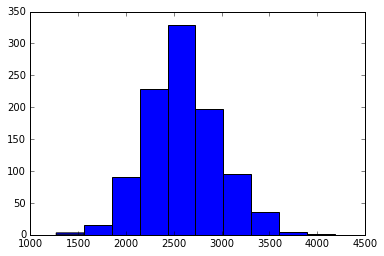

In [7]:
var_name = 'lphippvol' # 

histo = plt.hist([v for v in hie[var_name].values if ~np.isnan(v)])
print(len(hie))

In [8]:
N = len(hie) #take the first dimension (index dim)

## We need to sample 30 subjects from the 1000

In [9]:
# Could we use these ?
# sst.multinomial?
# sst.randint?
unif_N = sst.randint(1,10)
unif_N.rvs(size=(5,))
# This does sampling with replacement

array([2, 4, 8, 5, 1])

In [10]:
# np.random.randint(0,5+1, size=(3,))
Nsmall = 30
rows = np.random.permutation(np.arange(0,N))[:Nsmall]
print(rows)
r = slice(rows)

[575 770 181 124 660 623 615 869 329 965 783 725 580  75 391 242 374 820
 938 390 231 919 423 956 370 814 736 970  95 702]


In [11]:
hie.iloc[rows][:5]
#hie.index[rows]

,X,SID,scanner,lphippvol,gender,age,hand,anx,myst
575,575,P0787,Trio,2411,F,9.58,Right,NaN,1.627164
770,770,P1068,Disco,2653,M,NaN,Left,NaN,0.834255
181,181,P0262,Trio,2805,M,11.33,Right,NaN,2.987977
124,124,P0179,Signa,2271,M,5.42,Right,NaN,8.061507
660,660,P0917,Trio,2586,F,13.67,Right,0.64,1.078196


In [12]:
hie_small = hie.iloc[rows]

In [13]:
print(list(hie))

['X', 'SID', 'scanner', 'lphippvol', 'gender', 'age', 'hand', 'anx', 'myst']


In [14]:
# Run a multinomial logistic regression to predict all possible outcomes
# Here, we'll set the two earliest measurements as predictors
predictors = 'scanner + gender + age + myst ' # ''
Y = 'lphippvol'

formula = Y + ' ~ ' + predictors
mn_model = sm.OLS.from_formula(formula, hie_small, missing='drop')
mn_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              lphippvol   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.9748
Date:                Thu, 01 Nov 2018   Prob (F-statistic):              0.454
Time:                        15:09:17   Log-Likelihood:                -203.44
No. Observations:                  29   AIC:                             418.9
Df Residuals:                      23   BIC:                             427.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2977.6046    277.102     10.746      0.000    2404.375    3550.834
scanner[T.Disco] -5.849e-12   5.34e-13    -10.959      0.000   -6.95e-12   -4.74e-12
scanner[T.Signa]  -315.5100    300.335     -1.051      0.304    -936.800     305.780
scanner[T.Trio]   -313.9051    182.256     -1.722      0.098    -690.931      63.120
gender[T.M]         12.1377    127.803      0.095      0.925    -252.244     276.519
age                 -4.9806     13.024     -0.382      0.706     -31.922      21.961
myst                14.6592     46.493      0.315      0.755     -81.518     110.836
==============================================================================
Omnibus:                        5.038   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.081   Jarque-Bera (JB):                1.979
Skew:                           0.256   Prob(JB):                        0.372
Kurtosis:                       1.827   Cond. No.                     5.77e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.48e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [15]:
alpha_level = .05
if float(mn_model.fit().summary().tables[1].data[7][4]) < alpha_level:
    print("let's publish fast")
else:
    print("let's p-hack more")


let's p-hack more


In [16]:
import itertools
models_covariables = [elt for elt in itertools.product([0,1],[0,1],[0,1])]

In [17]:
cov_names = [' age ', ' hand ', ' gender ']
predictors = []
for cov in models_covariables:
    s = ''
    predictors.append(''.join([s + (cov_names[i] + '+')*cov[i] 
                                           for i in range(3)]))

In [18]:
predictors

['',
 ' gender +',
 ' hand +',
 ' hand + gender +',
 ' age +',
 ' age + gender +',
 ' age + hand +',
 ' age + hand + gender +']

In [19]:
for p in predictors:
    formula = Y + ' ~ ' + p + ' scanner + myst '
    mn_model = sm.OLS.from_formula(formula, hie_small, missing='drop')
    mn_model.fit().summary()
    data = mn_model.fit().summary().tables[1].data
    for d in data:
        if d[0] == 'myst':
            print(formula, d[4])

lphippvol ~  scanner + myst   0.653
lphippvol ~  gender + scanner + myst   0.686
lphippvol ~  hand + scanner + myst   0.139
lphippvol ~  hand + gender + scanner + myst   0.046
lphippvol ~  age + scanner + myst   0.706
lphippvol ~  age + gender + scanner + myst   0.755
lphippvol ~  age + hand + scanner + myst   0.169
lphippvol ~  age + hand + gender + scanner + myst   0.063
